In [31]:
# In this Customer Analytics Project we are learning 
# unsupervised learning using Hirrerchical clustering using Kmeans analysis
# Hierarchical clustering example is Animal Kingdom
# Use k-means clustering to identify clusters k is the no of clusters and cluster seeds is 
# centroid tells us how far is the cluster from the centroid by using the eucledian distance formula
# Squared eucledian distance is senstive to outliers

# import Libraries for Analysis
import pandas as pd
import numpy as np
import scipy

# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # seaborn and matplotlib are seamlessly integrated

#importing library for Standardization
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#importing Clustering Libraries
# dendogram is a tree like hirrarchical representation of points, linkage refers to the
# specific clustering methods that we deploy
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.decomposition import PCA

In [3]:
# store dataset in df_Segmentation as object/ dataframe for analysis
df_segmentation = pd.read_csv("segmentation data.csv", index_col =0 )

In [4]:
# check the first 5 rows of dataset
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [5]:
# check the summary of our data and check the descriptive statistics of the columns of the dataset
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [10]:
# the average age is 35 years and average income is 12000 aproximately

In [6]:
# check the correlation between variables by using Pearson Correlation
df_segmentation.corr()


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


In [15]:
# we see that Age and Education are correlated, Income and Occupation are Correlated

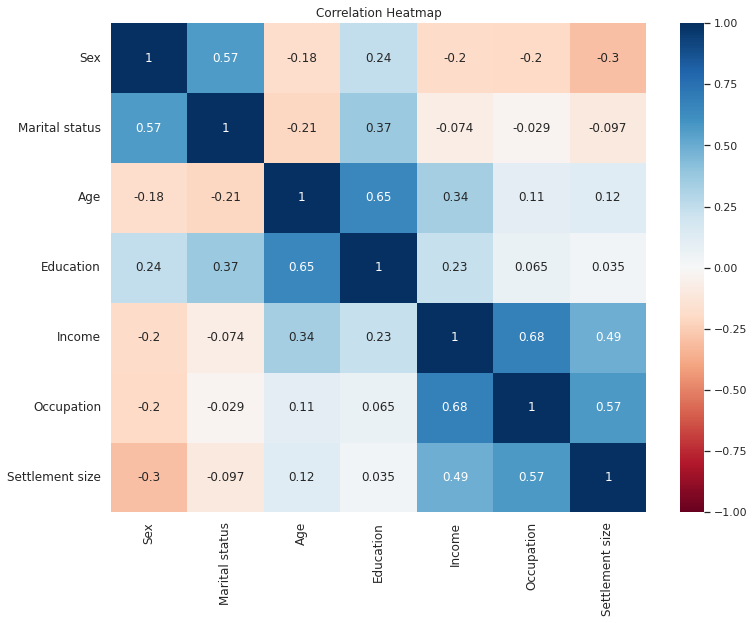

In [7]:
# plot figures
# annot retains the correlation coefficients
# s is oject for sns heatmap. Blue Colour for Greater Positive Values. Red Colour for Lower Negative Values
# colors can also be set to vividus or autumn
#vmin and vmax sets the boundaries for heatmap and this is the range for pearson correlation
#label the y and the x axis
plt.figure(figsize = (12,9))
s = sns.heatmap(df_segmentation.corr(),
                annot = True,
                cmap = 'RdBu',
                vmin = -1,
                vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap'),
plt.show()

Text(0.5, 1.0, 'Visualization of Raw Data')

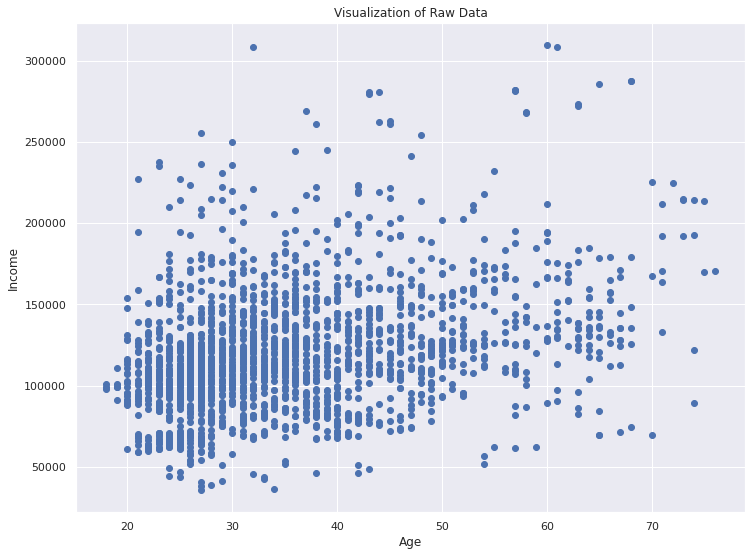

In [8]:
plt.figure(figsize =(12,9))
plt.scatter(df_segmentation.iloc[:,2], df_segmentation.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of Raw Data')

In [9]:
# standardizing the Data

scaler = StandardScaler() #Let scaler be an instance of StandardSCaler
segmenatation_std = scaler.fit_transform(df_segmentation) 


# store the result in new variable
# segmentation_std from applying the fit transform method fromt the standard scaler of our data

In [10]:
#hirrarchical clustering
hirr_clus = linkage(segmenatation_std, method = 'ward')

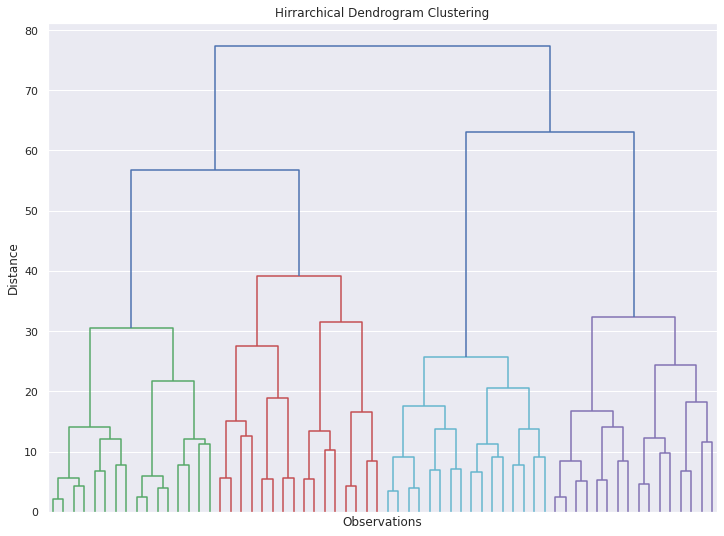

In [11]:
plt.figure(figsize = (12,9))
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.title('Hirrarchical Dendrogram Clustering')
dendrogram(hirr_clus,
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True,
           )
plt.show(dendrogram)

In [12]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmenatation_std)
    wcss.append(kmeans.inertia_)

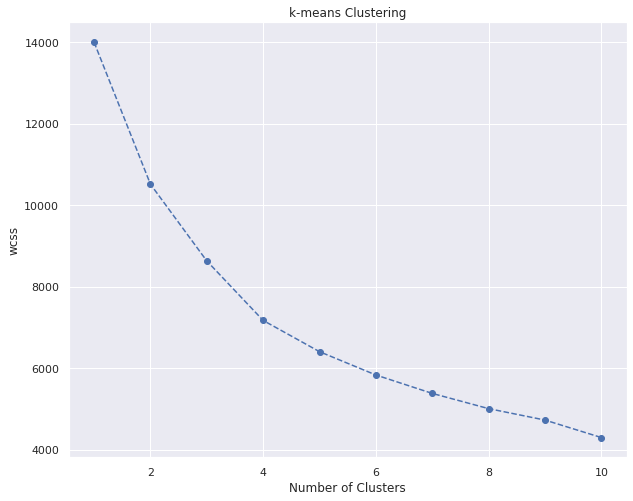

In [13]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.title('k-means Clustering')
plt.show()

In [14]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [15]:
kmeans.fit(segmenatation_std)

KMeans(n_clusters=4, random_state=42)

In [16]:
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] =kmeans.labels_

In [17]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()

In [18]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


In [20]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()

In [21]:
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs']/df_segm_analysis['N Obs'].sum()

In [22]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [25]:
df_segm_analysis.rename({0: 'well off',
                         1: 'Fewer Opportunities',
                         2: 'Standard',
                         3: 'Career Focussed'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
well off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
Fewer Opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
Standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
Career Focussed,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [26]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0: 'well off',
                                                                  1: 'Fewer Opportunities',
                                                                  2: 'Standard',
                                                                  3: 'Career Focussed'})

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Segmentation K-means')

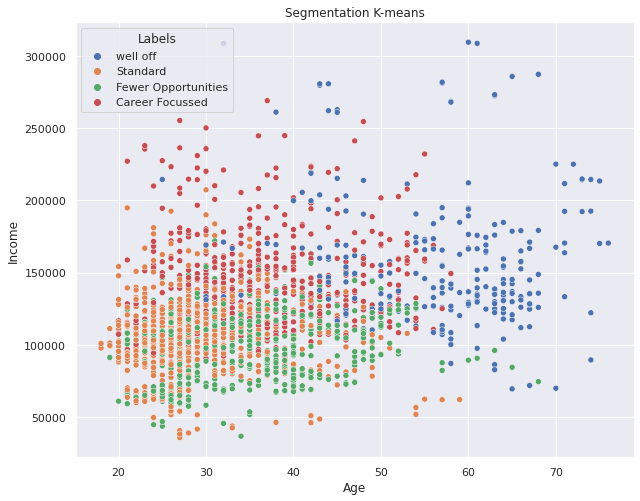

In [29]:
x_axis= df_segm_kmeans['Age']
y_axis= df_segm_kmeans['Income']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'])
plt.title('Segmentation K-means')

In [33]:
# applying PCA on data
pca = PCA()
pca.fit(segmenatation_std)

PCA()

In [35]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumulative Explained Variance')

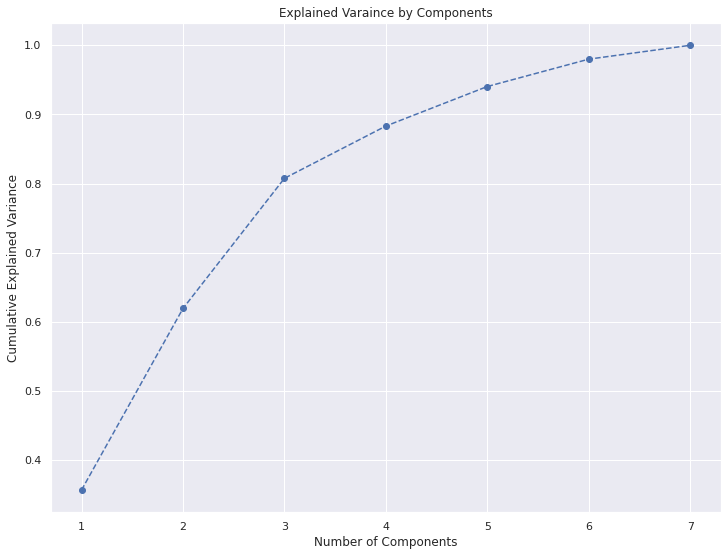

In [37]:
plt.figure(figsize= (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Varaince by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [40]:
pca = PCA(n_components=3)
pca.fit(segmenatation_std)

PCA(n_components=3)

In [41]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [43]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_segmentation.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3'])

In [44]:
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x7f3920c31450>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

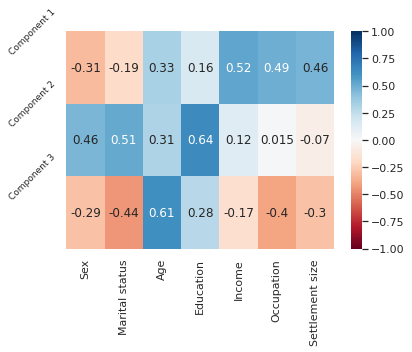

In [50]:
sns.heatmap(df_pca_comp,
           vmin = -1,
           vmax = 1,
           cmap = 'RdBu',
           annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 9)

In [52]:
pca.transform(segmenatation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [53]:
scores_pca = pca.transform(segmenatation_std)